# Plane passengers forecast using regression and Neural Networks

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Loading data

In [200]:
passengers = pd.read_csv('Passageiros.csv')

In [201]:
passengers = passengers.rename(columns={'tempo': 'time','passageiros':'passengers' })

In [202]:
  passengers.head()

,time,passengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [203]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

<Axes: xlabel='time', ylabel='passengers'>

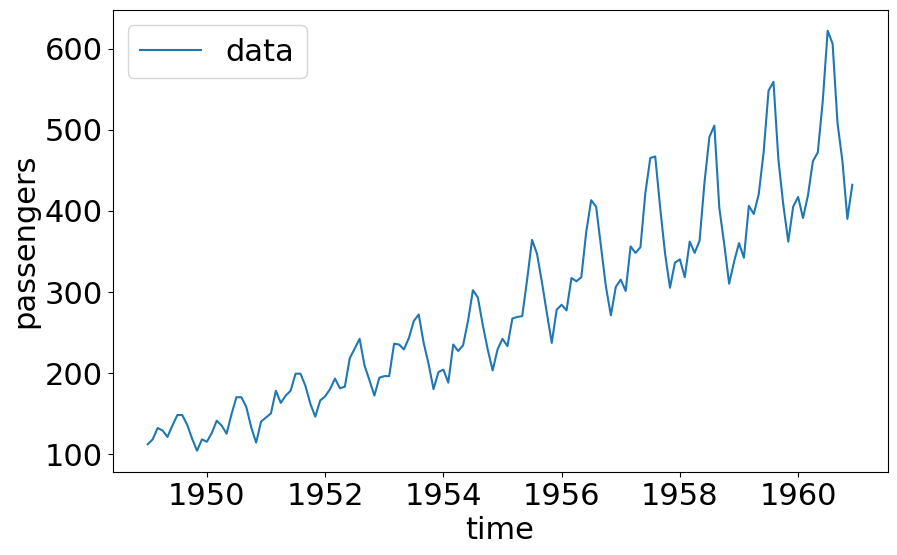

In [205]:
sns.lineplot(x='time',y='passengers',data=passengers,label='data')

# Data padronization

In [206]:
sc = StandardScaler()

In [ ]:
sc.fit(passengers)

In [208]:
padronizated_data = sc.transform(passengers)

In [209]:
x=padronizated_data[:,0]#data
y=padronizated_data[:,1]#label

Text(0.5, 0, 'Date')

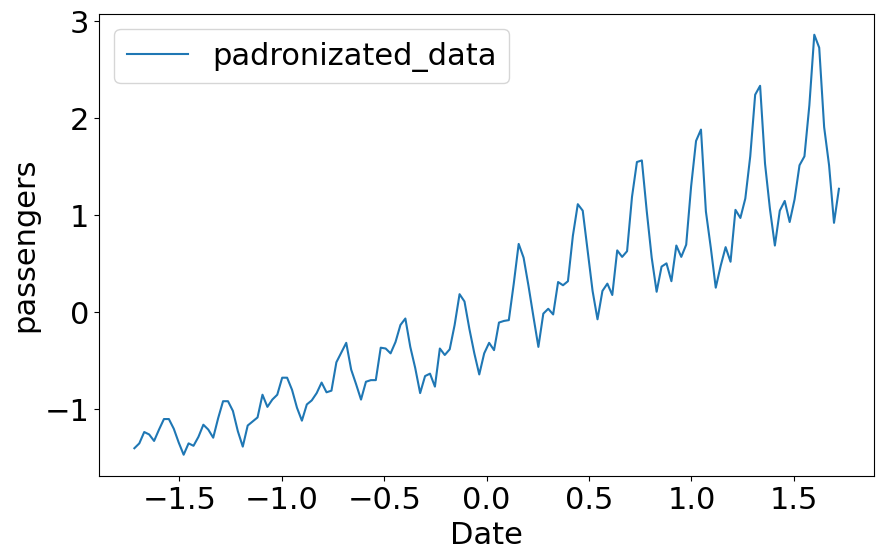

In [211]:
sns.lineplot(x=x,y=y,label='padronizated_data')
plt.ylabel('passengers')
plt.xlabel('Date')

# Splitting the data into training data & Testing data

In [212]:
train_size = int(len(passengers)*0.9) #Pegando 90% dos dados para treino
tes_size = len(passengers)-passengers #O resto vamos reservar para teste

In [213]:
X_train = x[0:train_size]
Y_train = y[0:train_size]

X_test = x[train_size:len(passengers)]
Y_test = y[train_size:len(passengers)]

<Axes: >

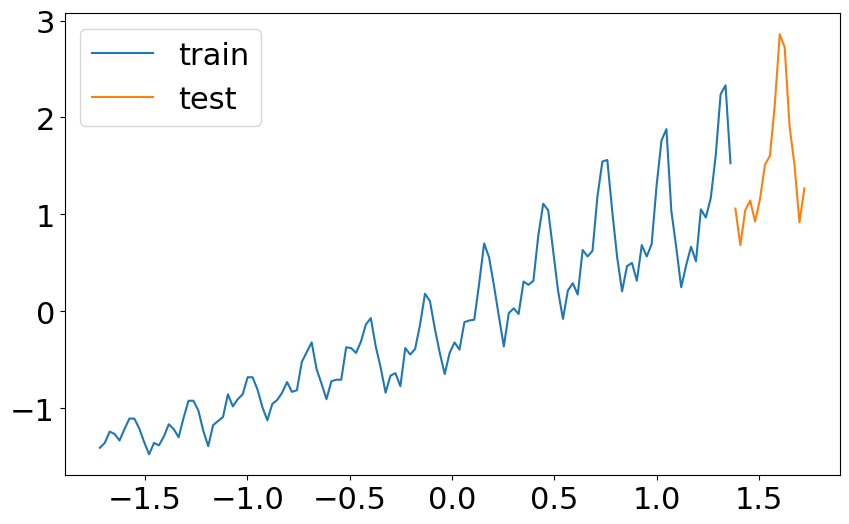

In [214]:
sns.lineplot(x=X_train,y=Y_train,label='train')
sns.lineplot(x=X_test,y=Y_test,label='test')

# **Linear Regression**

In [215]:
regression = Sequential()

In [216]:
regression.add(Dense(1, input_dim=1, kernel_initializer='Ones',
                    activation='linear',use_bias=False))

In [217]:
regression.compile(loss='mean_squared_error',optimizer='adam')

In [218]:
regression.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [219]:
regression.fit(X_train,Y_train)

5/5 [==============================] - 0s 3ms/step - loss: 0.1285


In [220]:
y_predict= regression.predict(X_train)

5/5 [==============================] - 0s 3ms/step


<Axes: >

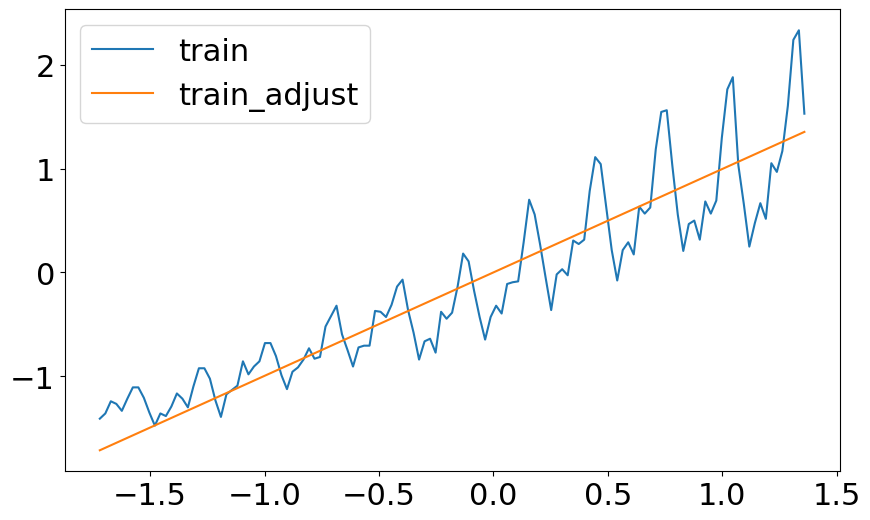

In [221]:
sns.lineplot(x=X_train,y=Y_train,label='train')
sns.lineplot(x=X_train,y=y_predict[:,0],label='train_adjust')

In [222]:
d = {'time': X_train, 'passengers': y_predict[:,0]}
results = pd.DataFrame(data=d)

In [223]:
results

,time,passengers
0,-1.720064,-1.712180
1,-1.696007,-1.688233
2,-1.671950,-1.664287
3,-1.647894,-1.640340
4,-1.623837,-1.616394
...,...,...
124,1.262984,1.257195
125,1.287041,1.281142
126,1.311098,1.305088
127,1.335155,1.329035


In [226]:
transf_results = sc.inverse_transform(results)

transf_results = pd.DataFrame(transf_results)
transf_results.columns = ['time','passengers']

<Axes: xlabel='time', ylabel='passengers'>

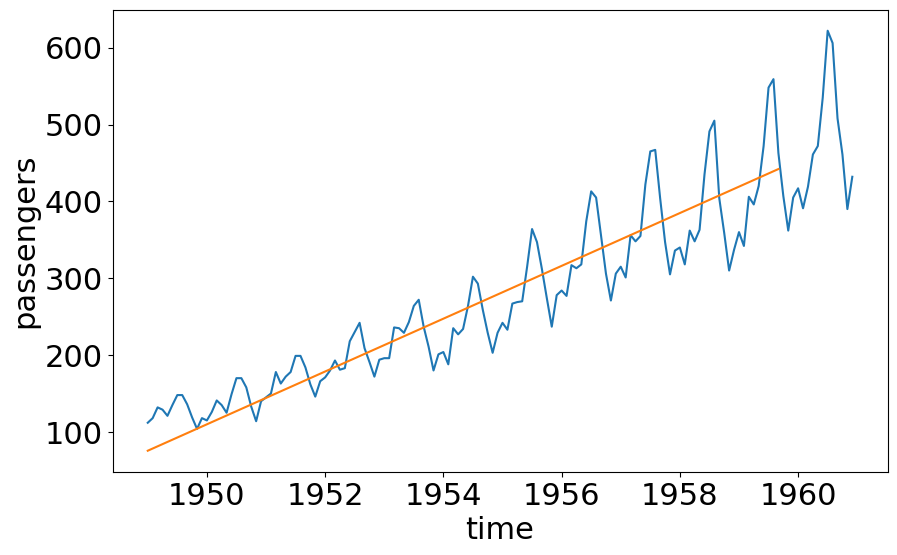

In [227]:
sns.lineplot(x="time",y="passengers",data=passengers)
sns.lineplot(x="time",y="passengers",data=transf_results)

In [228]:
y_predict_test= regression.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [231]:
d = {'time': X_test, 'passengers': y_predict_test[:,0]}
test_results = pd.DataFrame(data=d)

In [233]:
test_transf_result = sc.inverse_transform(test_results)

test_transf_result = pd.DataFrame(test_transf_result)
test_transf_result.columns = ['time','passengers']

<Axes: xlabel='time', ylabel='passengers'>

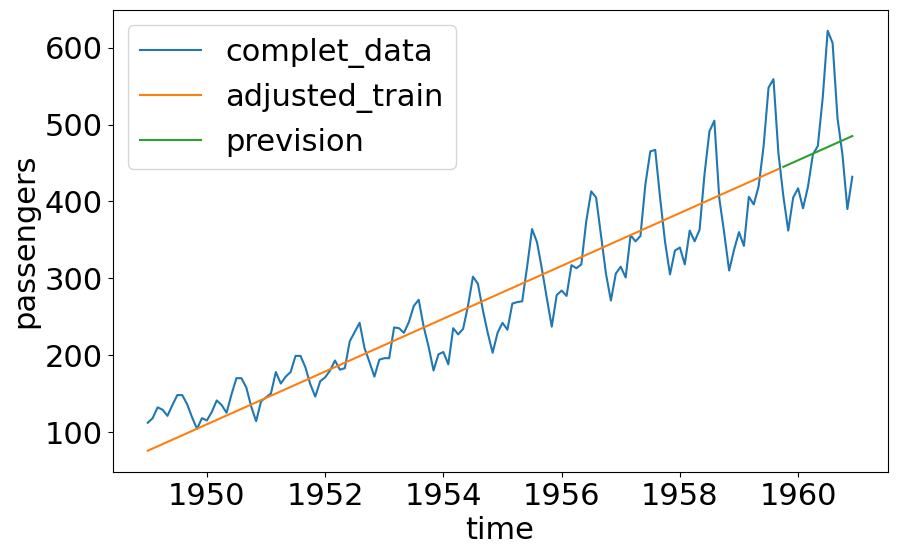

In [234]:
sns.lineplot(x="time",y="passengers",data=passengers,label='complet_data')
sns.lineplot(x="time",y="passengers",data=transf_results,label='adjusted_train')
sns.lineplot(x="time",y="passengers",data=test_transf_result,label='prevision')

# **Non Linear Regression**

In [235]:
regression2 = Sequential()

In [236]:
regression2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regression2.add(Dense(8, kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regression2.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear',use_bias=False))

In [237]:
regression2.compile(loss='mean_squared_error',optimizer='adam')
regression2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 8)                 8         
                                                                 
 dense_35 (Dense)            (None, 8)                 64        
                                                                 
 dense_36 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


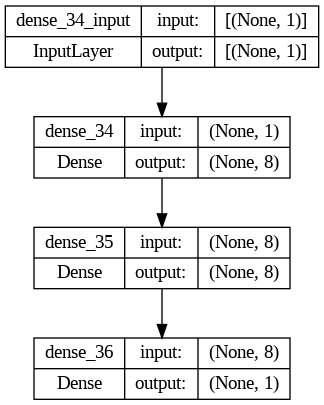

In [238]:
tf.keras.utils.plot_model(
    regression2,
    show_shapes=True,
    show_layer_names=True,
)

In [239]:
regression2.fit(X_train,Y_train,epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8162
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8111
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8069
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8036
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7999
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7971
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7962
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7951
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7946
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7934
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7918
Epoch 12/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7898
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [240]:
y_predict = regression2.predict(X_train)

5/5 [==============================] - 0s 9ms/step


In [241]:
test_y_predict = regression2.predict(X_test)

1/1 [==============================] - 0s 20ms/step


<Axes: >

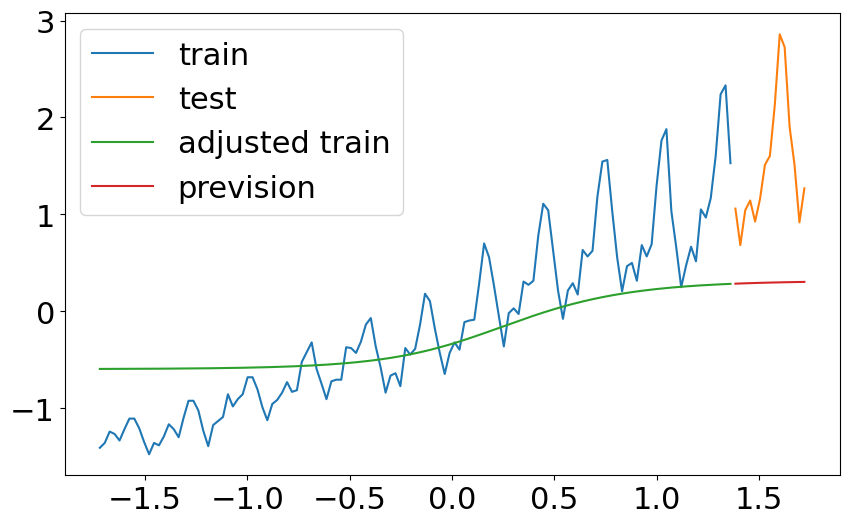

In [242]:
sns.lineplot(x=X_train,y=Y_train,label='train')
sns.lineplot(x=X_test,y=Y_test,label='test')
sns.lineplot(x=X_train,y=y_predict[:,0],label='adjusted train')
sns.lineplot(x=X_test,y=test_y_predict[:,0],label='prevision')

# Changing the way we pass the data

Now, x and y will take different values. X will contain the number of passengers at a previous time, and y will contain the number of passengers at t+1, for example.

In [243]:
vector = pd.DataFrame(Y_train)[0]

In [244]:
def split_data(vector, n_steps):
    X_new, Y_new = [], []

    for i in range(n_steps, len(vector)):
        X_new.append(list(vector[i - n_steps:i]))
        Y_new.append(vector[i])


    X_new, Y_new = np.array(X_new), np.array(Y_new)

    return X_new, Y_new


In [245]:
X_train_new,Y_train_new = split_data(vector,1)

In [246]:
X_train_new[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [247]:
Y_train_new[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Now spliting the Test data

In [248]:
vector2 = pd.DataFrame(Y_test)[0]

In [249]:
X_test_new,Y_test_new = split_data(vector2,1)

# back to the NN

In [250]:
regression3 = Sequential()

In [251]:
regression3.add(Dense(8,input_dim=1,kernel_initializer='Ones',activation='linear',use_bias=False))

regression3.add(Dense(64,input_dim=1,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))

regression3.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))

In [252]:
regression3.compile(loss="mean_squared_error",optimizer='adam')

In [253]:
regression3.fit(X_train_new,Y_train_new,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7807
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7527
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7326
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7101
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6883
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6629
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6362
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6095
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5780
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5465
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5130
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4746
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [254]:
y_predict_new = regression3.predict(X_train_new)

4/4 [==============================] - 0s 2ms/step


<Axes: xlabel='time', ylabel='0'>

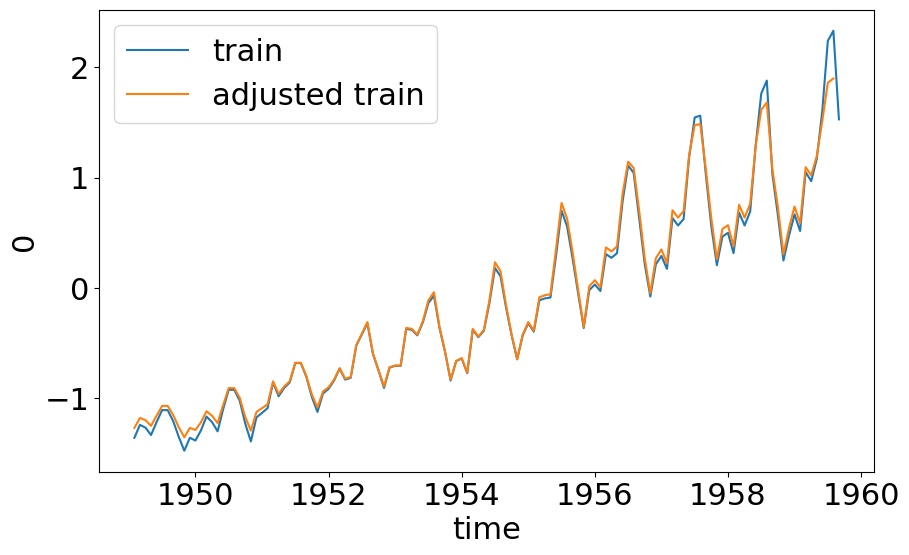

In [255]:
sns.lineplot(x='time',y=Y_train_new,data=passengers[1:129],label='train')
sns.lineplot(x='time',y=pd.DataFrame(y_predict_new)[0],data=passengers[1:129],label='adjusted train')

In [256]:
y_pred_test_new = regression3.predict(X_test_new)

1/1 [==============================] - 0s 46ms/step


In [257]:
result = pd.DataFrame(y_pred_test_new)[0]

<Axes: xlabel='time', ylabel='0'>

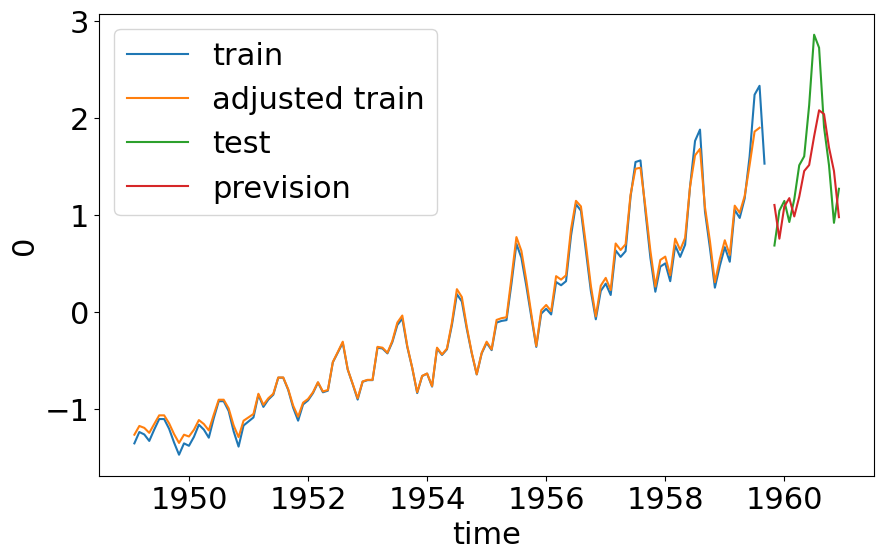

In [258]:
sns.lineplot(x='time',y=Y_train_new,data=passengers[1:129],label='train')
sns.lineplot(x='time',y=pd.DataFrame(y_predict_new)[0],data=passengers[1:129],label='adjusted train')
sns.lineplot(x='time',y=Y_test_new,data=passengers[130:144],label="test")
sns.lineplot(x='time',y=result.values,data=passengers[130:144],label="prevision")

# Windows

In [259]:
X_train_new ,Y_train_new = split_data(vector,4)

In [260]:
X_train_new[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [261]:
Y_train_new[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [262]:
X_test_new,Y_test_new = split_data(vector2,4)

In [263]:
regression4 = Sequential()

In [264]:
regression4.add(Dense(8,input_dim=4,kernel_initializer='Ones',activation='linear',use_bias=False))

regression4.add(Dense(64,input_dim=1,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))

regression4.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))

In [265]:
regression4.compile(loss='mean_squared_error',optimizer='adam')

In [266]:
regression4.fit(X_train_new,Y_train_new,epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7737
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6866
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6261
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5590
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4984
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4306
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3705
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3158
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2183
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1862
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1621
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

In [267]:
Y_predict_new = regression4.predict(X_train_new)

4/4 [==============================] - 0s 4ms/step


In [268]:
Y_predict_test_new = regression4.predict(X_test_new)

1/1 [==============================] - 0s 29ms/step


In [269]:
train_result = pd.DataFrame(Y_predict_new)[0]

In [270]:
result = pd.DataFrame(Y_predict_test_new)[0]

<Axes: xlabel='time'>

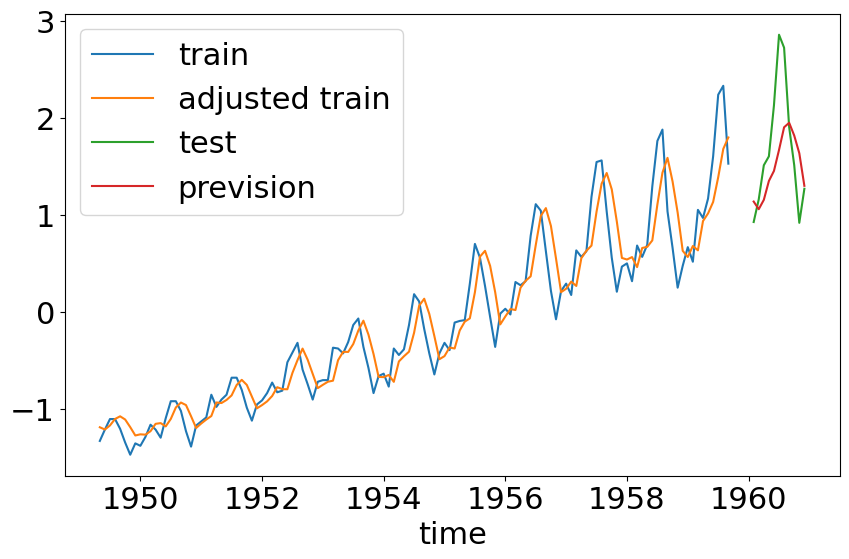

In [271]:
sns.lineplot(x='time',y=Y_train_new,data=passengers[4:129],label='train')
sns.lineplot(x='time',y=train_result.values,data=passengers[4:129],label='adjusted train')
sns.lineplot(x='time',y=Y_test_new,data=passengers[133:144],label='test')
sns.lineplot(x='time',y=result.values,data=passengers[133:144],label='prevision')